In [1]:
import os
import pandas as pd

In [2]:
df = pd.read_csv(os.path.join('..','data','snowboard_data.csv'))
df

,post_id,title,price,location,link,full_text
0,postid_7404893646,Dakine Snowboard 140 with bindings,100.0,Granada hills san fernando valley,https://losangeles.craigslist.org/sfv/spo/d/mi...,Dakine Snowboard 140 with bindings Granada hi...
1,postid_7402218394,Morrow Snowboard 148 cm with morrow bindings,125.0,Granada hills san fernando valley,https://losangeles.craigslist.org/sfv/spo/d/mi...,Morrow Snowboard 148 cm with morrow bindings ...
2,postid_7410755840,Ride Snowboard 115 Cm and small Solomon bindings,125.0,Granada hills san fernando valley,https://losangeles.craigslist.org/sfv/spo/d/mi...,Ride Snowboard 115 Cm and small Solomon bindin...
3,postid_7407043907,WOMENS SNOWBOARD BOOTS,160.0,Arcadia san gabriel valley,https://losangeles.craigslist.org/sgv/spo/d/ar...,WOMENS SNOWBOARD BOOTS Arcadia san gabriel valley
4,postid_7413745357,"Women’s Snowboard, Bindings, and Boots",200.0,central LA 213/323,https://losangeles.craigslist.org/lac/spo/d/lo...,"Women’s Snowboard, Bindings, and Boots centra..."
...,...,...,...,...,...,...
469,postid_7406161068,Snowboards with bindings,120.0,Encino san fernando valley,https://losangeles.craigslist.org/sfv/spo/d/en...,Snowboards with bindings Encino san fernando v...
470,postid_7411626803,Snowboards,300.0,Frog Town central LA 213/323,https://losangeles.craigslist.org/lac/spo/d/lo...,Snowboards Frog Town central LA 213/323
471,postid_7408311060,Bird Scooter ES-1 Segway ES-1 Electric Scooter...,399.0,LA County westside-southbay-310,https://losangeles.craigslist.org/wst/sgd/d/lo...,Bird Scooter ES-1 Segway ES-1 Electric Scooter...
472,postid_7405832903,Toyota Tacoma Roof Rack,199.0,Los Angeles westside-southbay-310,https://losangeles.craigslist.org/wst/ptd/d/re...,Toyota Tacoma Roof Rack Los Angeles westside-s...


In [7]:
df_1 = df[['full_text','price']]
df_1.full_text = df_1.full_text.str.lower()
df_1

/home/ayman/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,full_text,price
0,dakine snowboard 140 with bindings granada hi...,100.0
1,morrow snowboard 148 cm with morrow bindings ...,125.0
2,ride snowboard 115 cm and small solomon bindin...,125.0
3,womens snowboard boots arcadia san gabriel valley,160.0
4,"women’s snowboard, bindings, and boots centra...",200.0
...,...,...
469,snowboards with bindings encino san fernando v...,120.0
470,snowboards frog town central la 213/323,300.0
471,bird scooter es-1 segway es-1 electric scooter...,399.0
472,toyota tacoma roof rack los angeles westside-s...,199.0


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = df_1.full_text
y = df_1.price.values.reshape(-1,1)


vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
X

<474x960 sparse matrix of type '<class 'numpy.float64'>'
	with 5212 stored elements in Compressed Sparse Row format>

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = model.predict(X_test)

In [29]:
from matplotlib import pyplot as plt

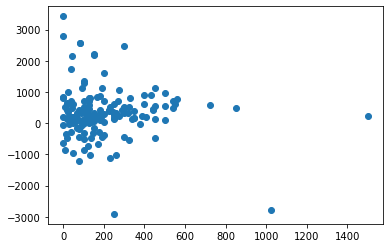

In [30]:
plt.scatter(y_test, y_pred)
plt.show()

In [33]:
from sklearn.metrics import r2_score, mean_squared_error

r2_score(y_test, y_pred)
mean_squared_error(y_test, y_pred)

727701.5998912492